For a detailed explanation and code interpretation, please visit the [GitHub repository](https://github.com/Mohsto/Loan-requests-prediction).

# Importing libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [2]:
df = pd.read_csv("loan_data.csv")

In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Statistical overview

In [5]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [6]:
df.loc[df["person_age"] > 70]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144.0,male,Bachelor,300616.0,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,144.0,male,Associate,241424.0,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
575,123.0,female,High School,97140.0,101,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
747,123.0,male,Bachelor,94723.0,100,RENT,20000.0,VENTURE,11.01,0.21,4.0,714,Yes,0
32297,144.0,female,Associate,7200766.0,124,MORTGAGE,5000.0,PERSONAL,12.73,0.00,25.0,850,No,0
32355,78.0,male,Associate,58463.0,57,RENT,3000.0,MEDICAL,7.51,0.05,25.0,754,No,0
32381,73.0,female,Bachelor,51415.0,47,MORTGAGE,5000.0,PERSONAL,7.49,0.10,28.0,706,No,0
32416,94.0,male,High School,29738.0,76,RENT,6500.0,MEDICAL,11.01,0.22,27.0,773,No,0
32422,80.0,male,High School,77894.0,62,RENT,6800.0,MEDICAL,11.71,0.09,25.0,673,No,0
32432,73.0,male,Bachelor,90678.0,47,RENT,7800.0,MEDICAL,11.01,0.09,24.0,696,Yes,0


In [7]:
df = df.loc[~(df["person_age"] > 70)]

Checking for missing data

In [8]:
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

# Exploratory data analysis

## Summary statistics

## Univariate analysis

#### Categorical variables

In [9]:
for category in df.columns:
    if df[category].dtype == 'object':  
        print(f"Value counts for column: {category}")
        print(df[category].value_counts())  
        print("\n")

Value counts for column: person_gender
person_gender
male      24830
female    20155
Name: count, dtype: int64


Value counts for column: person_education
person_education
Bachelor       13393
Associate      12024
High School    11967
Master          6980
Doctorate        621
Name: count, dtype: int64


Value counts for column: person_home_ownership
person_home_ownership
RENT        23434
MORTGAGE    18483
OWN          2951
OTHER         117
Name: count, dtype: int64


Value counts for column: loan_intent
loan_intent
EDUCATION            9151
MEDICAL              8542
VENTURE              7815
PERSONAL             7549
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64


Value counts for column: previous_loan_defaults_on_file
previous_loan_defaults_on_file
Yes    22854
No     22131
Name: count, dtype: int64




In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44985 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44985 non-null  float64
 1   person_gender                   44985 non-null  object 
 2   person_education                44985 non-null  object 
 3   person_income                   44985 non-null  float64
 4   person_emp_exp                  44985 non-null  int64  
 5   person_home_ownership           44985 non-null  object 
 6   loan_amnt                       44985 non-null  float64
 7   loan_intent                     44985 non-null  object 
 8   loan_int_rate                   44985 non-null  float64
 9   loan_percent_income             44985 non-null  float64
 10  cb_person_cred_hist_length      44985 non-null  float64
 11  credit_score                    44985 non-null  int64  
 12  previous_loan_defaults_on_file  44985

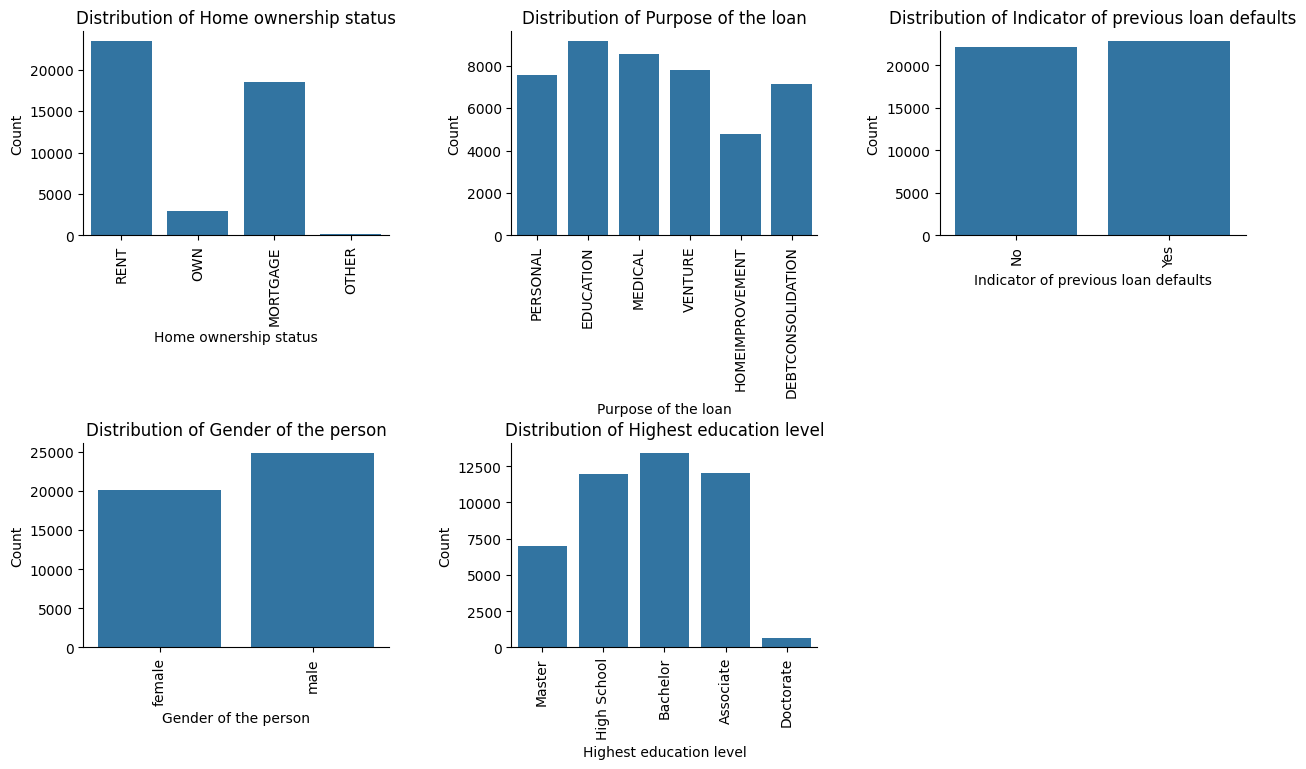

In [11]:
names = [
    "Home ownership status", "Purpose of the loan", "Indicator of previous loan defaults",
    "Gender of the person", "Highest education level"
]

categorical_columns = [
    "person_home_ownership", "loan_intent", "previous_loan_defaults_on_file", 
    "person_gender", "person_education"
]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))  
fig.subplots_adjust(hspace = 1.02, wspace = 0.4)  

axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])  
    axes[i].set_title(f"Distribution of {names[i]}", fontsize=12)
    axes[i].set_xlabel(names[i])
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis = 'x', rotation = 90)  

for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

sns.despine()
plt.show()

#### Numerical variables

Distribution and summary

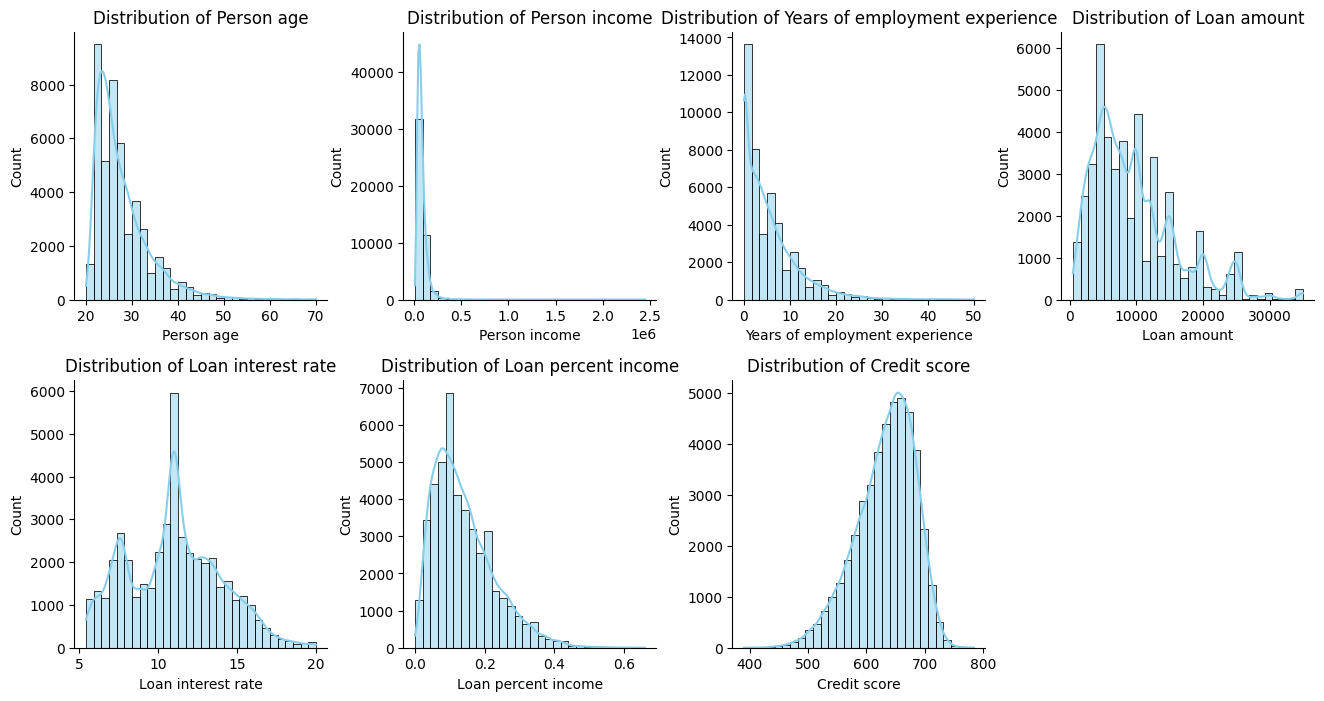

In [12]:
names = [
    "Person age", "Person income", "Years of employment experience", 
    "Loan amount", "Loan interest rate", "Loan percent income", "Credit score"
]

numeric_columns = [
    "person_age", "person_income", "person_emp_exp", 
    "loan_amnt", "loan_int_rate", "loan_percent_income", "credit_score"
]

fig, axes = plt.subplots(2, 4, figsize=(16, 8)) 
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)  

axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde = True, bins = 30, ax = axes[i], color = "skyblue")
    axes[i].set_title(f"Distribution of {names[i]}", fontsize = 12)
    axes[i].set_xlabel(names[i])
    axes[i].set_ylabel("Count")

if len(numeric_columns) < len(axes):
    for j in range(len(numeric_columns), len(axes)):
        fig.delaxes(axes[j])

sns.despine()
plt.show()

Boxplots for outliers

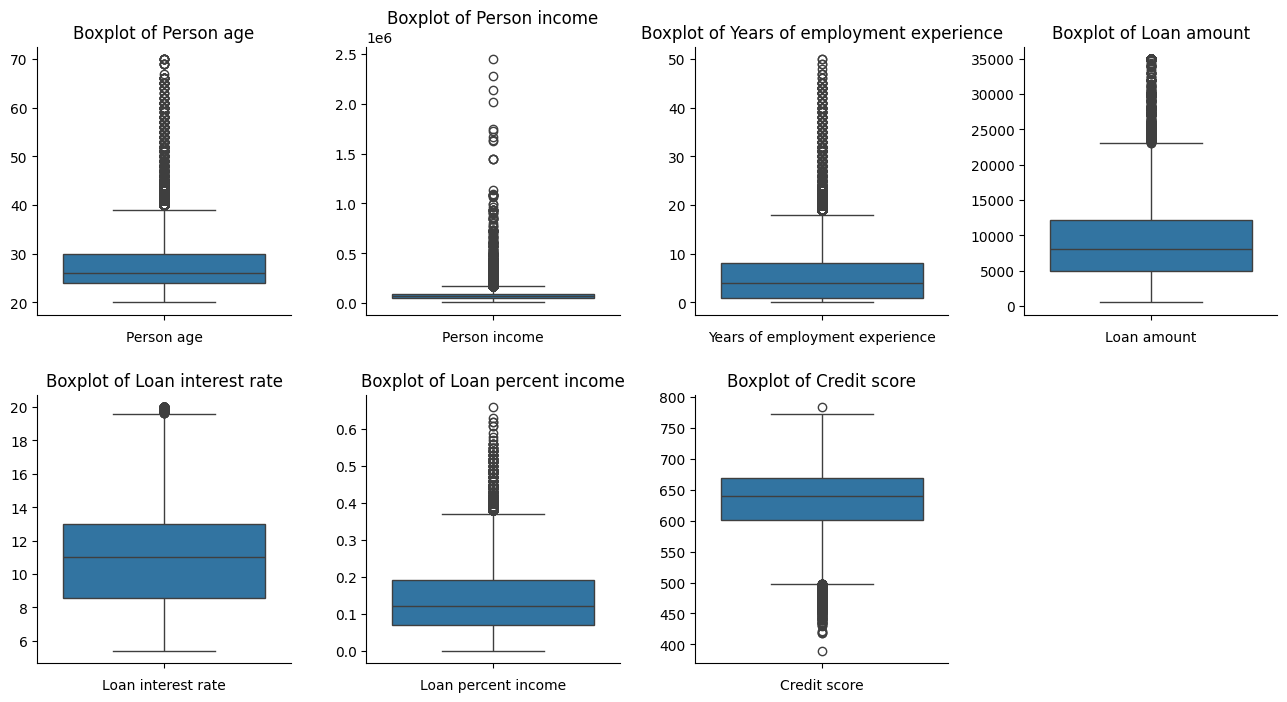

In [13]:
names = [
    "Person age", "Person income", "Years of employment experience", 
    "Loan amount", "Loan interest rate", "Loan percent income", "Credit score"
]

numeric_columns = [
    "person_age", "person_income", "person_emp_exp", 
    "loan_amnt", "loan_int_rate", "loan_percent_income", "credit_score"
]

fig, axes = plt.subplots(2, 4, figsize=(16, 8)) 
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)  

axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(df[col], ax = axes[i])
    axes[i].set_title(f"Boxplot of {names[i]}", fontsize = 12)
    axes[i].set_xlabel(names[i])
    axes[i].set_ylabel("")

if len(numeric_columns) < len(axes):
    for j in range(len(numeric_columns), len(axes)):
        fig.delaxes(axes[j])

sns.despine()
plt.show()

## Multivariate analysis

/var/folders/w8/_c74tplx26q91cmt17qdmvg80000gn/T/ipykernel_52365/2456857829.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = "Loan status", fontsize = 20)


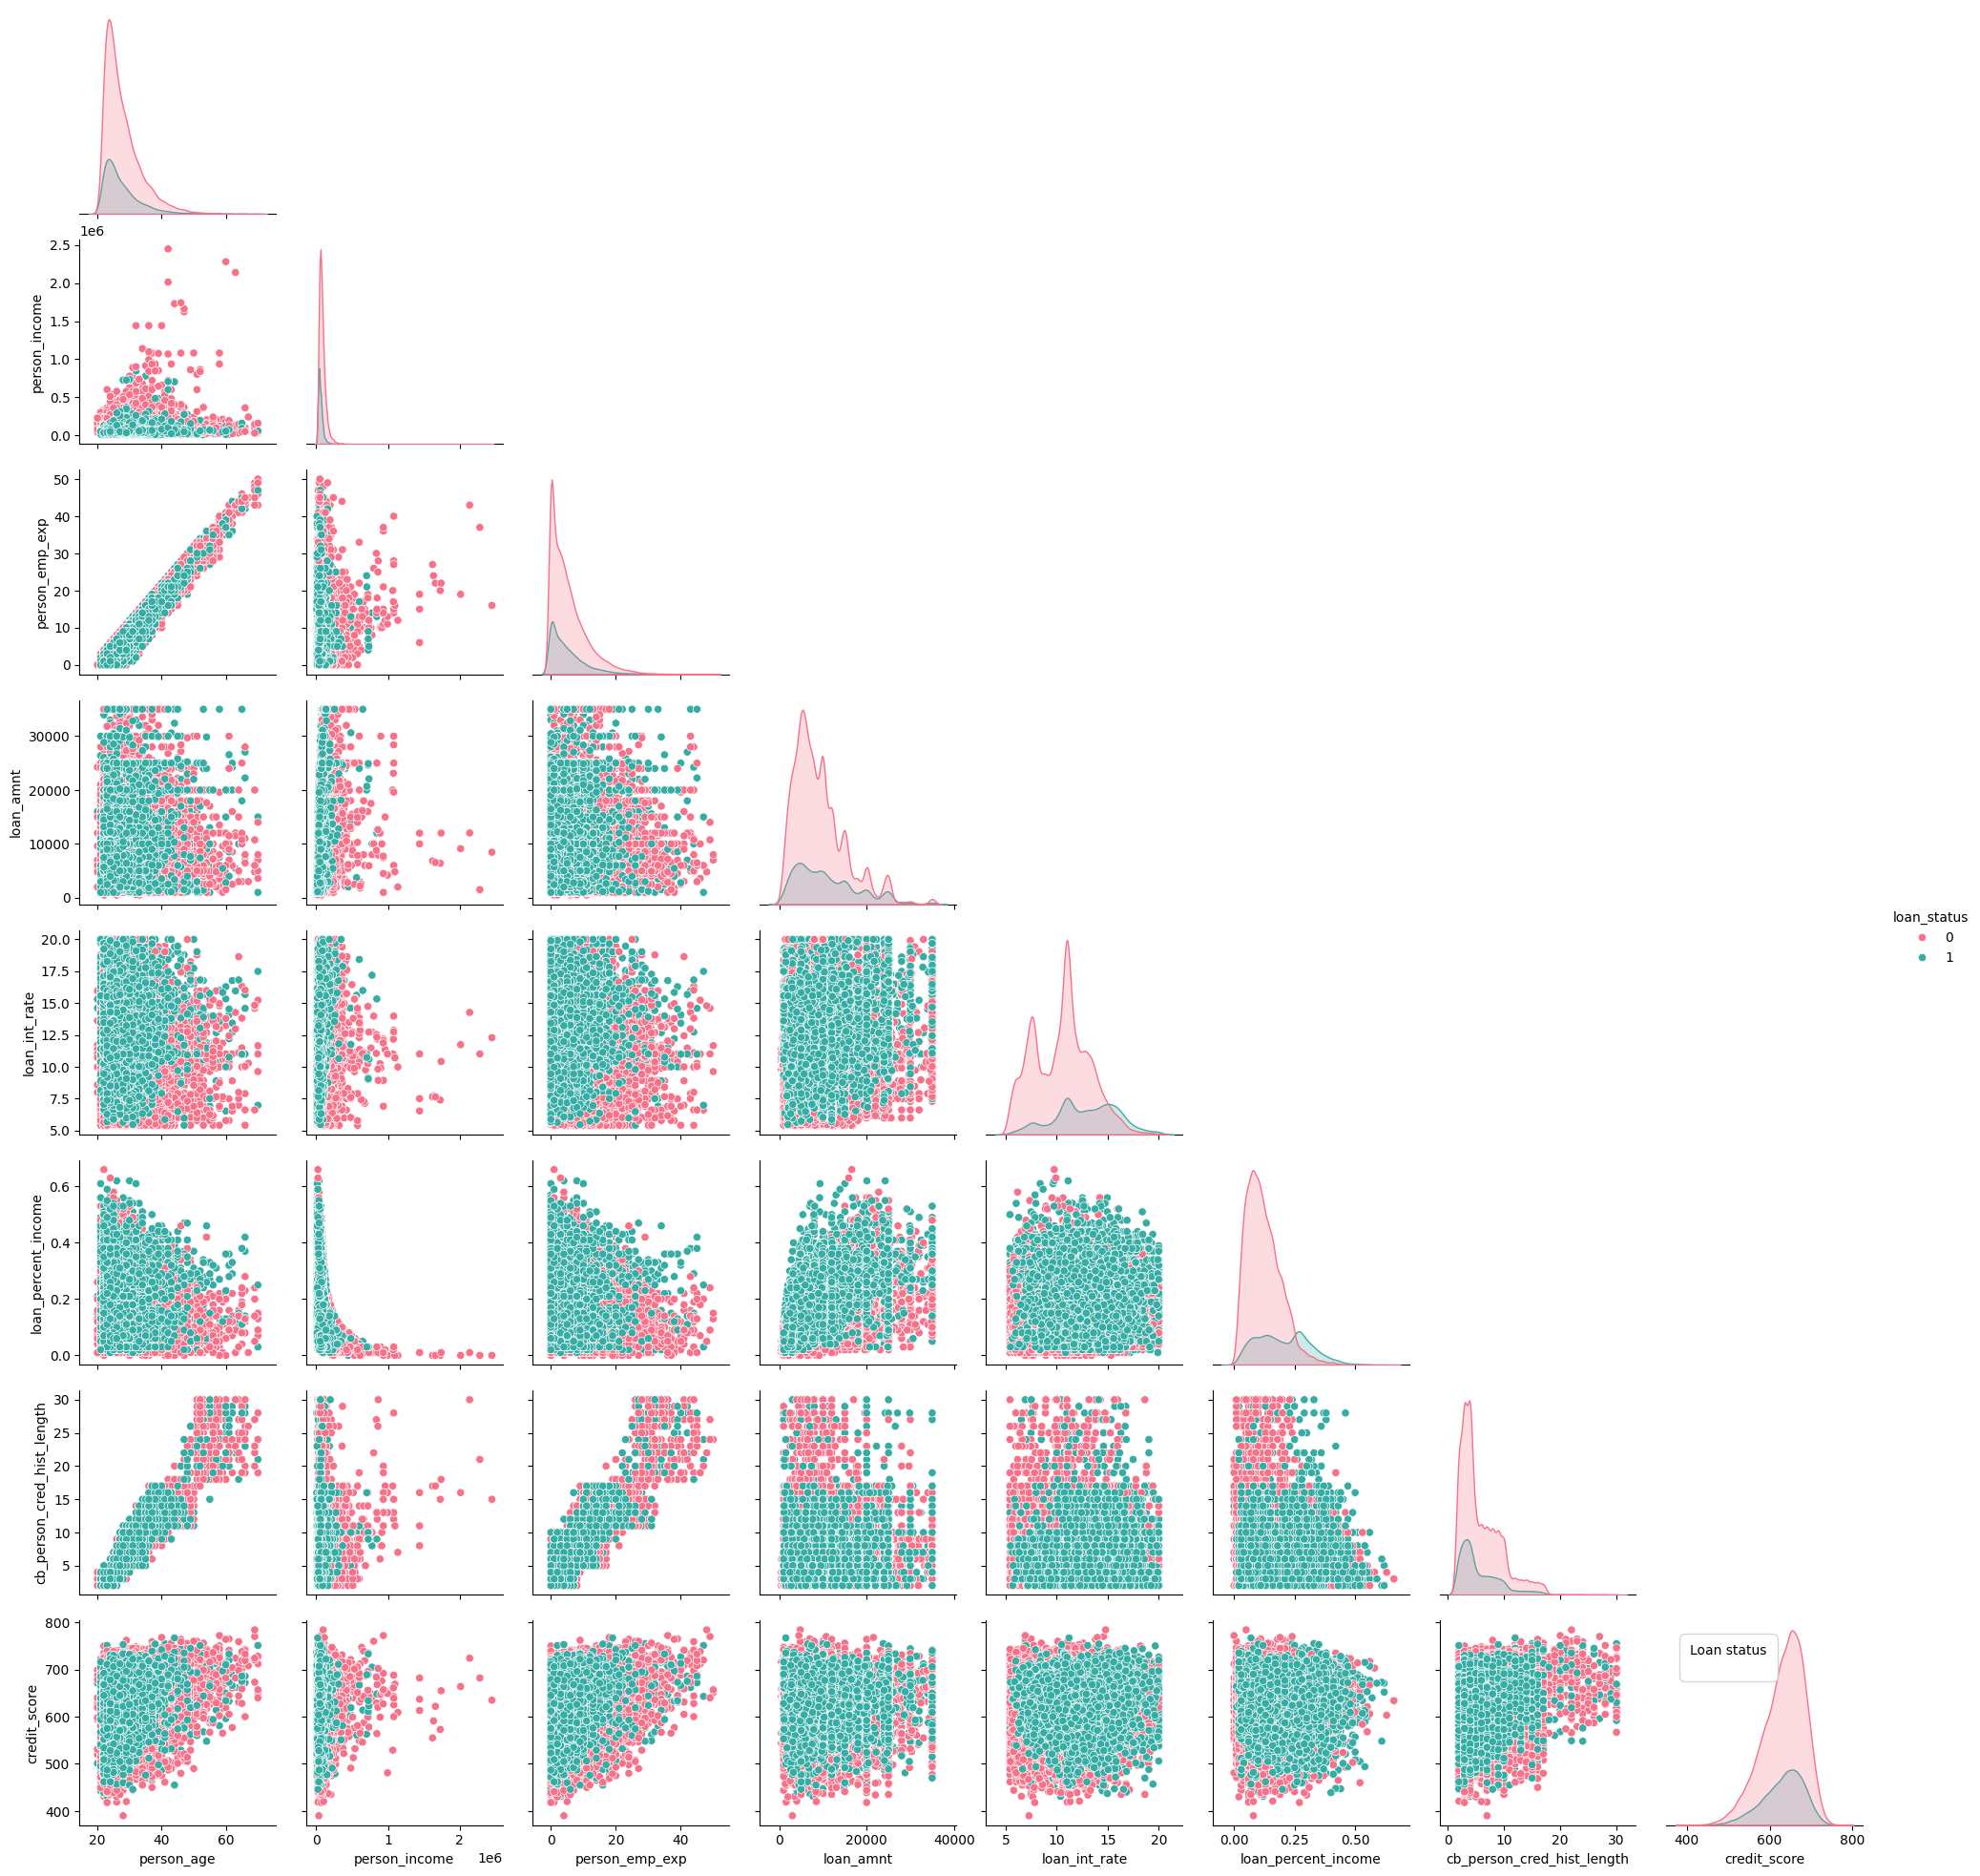

In [14]:
sns.pairplot(df, hue="loan_status", corner = True, palette="husl")
plt.legend(title = "Loan status", fontsize = 20)

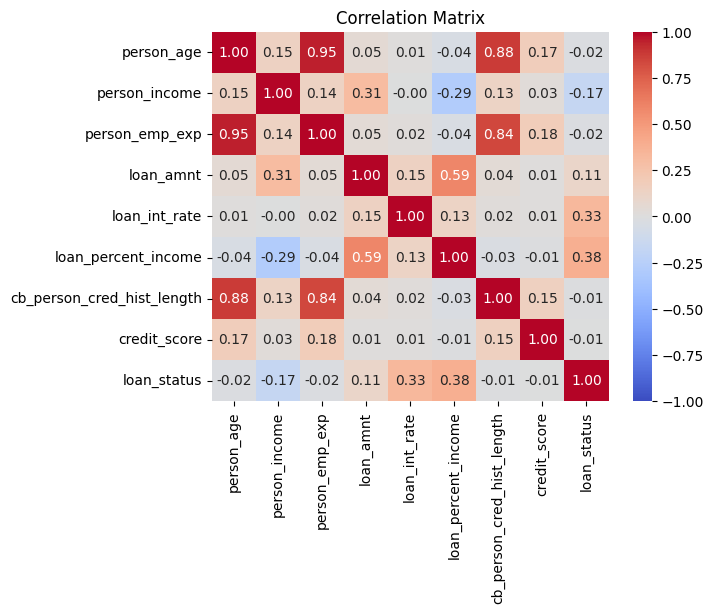

In [15]:
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", vmax = 1, vmin = -1)
plt.title("Correlation Matrix")
plt.show()

## Feature specific analysis

### Persons age

In [16]:
df["person_age_bins"] = pd.cut(
    df["person_age"],
    bins = [19, 25, 30, 40, 71],
    labels = ["20-25", "25-30", "30-40", "40-70"]
)

In [17]:
print(df["person_age_bins"].value_counts())  
print(df["person_age_bins"].isnull().sum()) 

person_age_bins
20-25    20441
25-30    13958
30-40     8762
40-70     1824
Name: count, dtype: int64
0


/var/folders/w8/_c74tplx26q91cmt17qdmvg80000gn/T/ipykernel_52365/3761767038.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(["person_age_bins", "loan_status"]).size().reset_index(name = "count")


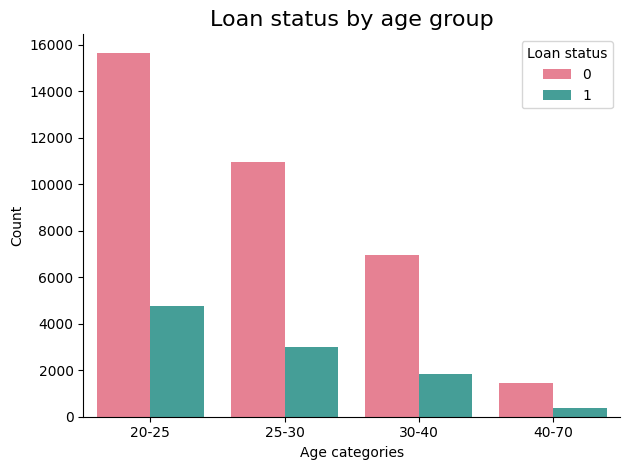

In [18]:
grouped_data = df.groupby(["person_age_bins", "loan_status"]).size().reset_index(name = "count")

sns.barplot(
    data = grouped_data,
    x = "person_age_bins",
    y = "count",
    hue = "loan_status", 
    palette = "husl"
)

plt.title("Loan status by age group", fontsize = 16)
plt.xlabel("Age categories")
plt.ylabel("Count")
plt.legend(title = "Loan status")
plt.tight_layout()
sns.despine()
plt.show()

# Modeling

In [27]:
df_model = df.copy()

In [28]:
df_model.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_age_bins,credit_score_category
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,20-25,Poor
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,20-25,Poor
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,20-25,Fair
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,20-25,Good
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,20-25,Fair


## Feature engineering

In [29]:
df_model = pd.get_dummies(df_model, drop_first = True)

bool_columns = df_model.select_dtypes(include='bool').columns

df_model[bool_columns] = df_model[bool_columns].astype(int)

In [30]:
df_model.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes,person_age_bins_25-30,person_age_bins_30-40,person_age_bins_40-70,credit_score_category_Fair,credit_score_category_Good,credit_score_category_Very Good,credit_score_category_Excellent
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,0,...,1,0,0,0,0,0,0,0,0,0
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,0,...,0,0,1,0,0,0,0,0,0,0
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,0,...,0,0,0,0,0,0,1,0,0,0
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,0,...,0,0,0,0,0,0,0,1,0,0
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,1,...,0,0,0,0,0,0,1,0,0,0


## Classification

In [31]:
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [32]:
X = df_model.drop(columns=['loan_status'])
y = df_model['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

### Logistic regression

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

log_reg = LogisticRegression(random_state = 42)
log_reg_scores = cross_validate(log_reg, X_scaled, y_train, cv = cv, scoring = scoring, return_train_score = False)

print("\nLogistic regression scores:")
for metric in scoring:
    print(f"{metric.capitalize()}: {log_reg_scores['test_' + metric].mean():.4f}")



Logistic regression scores:
Accuracy: 0.8958
Precision: 0.7773
Recall: 0.7441
F1: 0.7602
Roc_auc: 0.9532


### Random forest

In [35]:
random_forest = RandomForestClassifier(random_state = 42)
rf_scores = cross_validate(random_forest, X_scaled, y_train, cv = cv, scoring = scoring, return_train_score = False)

print("\nRandom forest scores:")
for metric in scoring:
    print(f"{metric.capitalize()}: {rf_scores['test_' + metric].mean():.4f}")



Random forest scores:
Accuracy: 0.9259
Precision: 0.8963
Recall: 0.7533
F1: 0.8185
Roc_auc: 0.9721


In [36]:
random_forest.fit(X_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

y_pred = random_forest.predict(X_test_scaled)
y_pred_proba = random_forest.predict_proba(X_test_scaled)[:, 1] 

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nRandom Forest evaluation on the test data:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")
print(f"ROC-AUC: {test_roc_auc:.4f}")


Random Forest evaluation on the test data:
Accuracy: 0.9276
Precision: 0.8939
Recall: 0.7672
F1-Score: 0.8257
ROC-AUC: 0.9756


### K-nearest neighbors

In [37]:
normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(X_train)

knn = KNeighborsClassifier()
knn_scores = cross_validate(knn, X_normalized, y_train, cv = cv, scoring = scoring, return_train_score = False)

print("\nKNN scores:")
for metric in scoring:
    print(f"{metric.capitalize()}: {knn_scores['test_' + metric].mean():.4f}")



KNN scores:
Accuracy: 0.8663
Precision: 0.7315
Recall: 0.6288
F1: 0.6762
Roc_auc: 0.9025


### Naive bayes

In [38]:
naive_bayes = GaussianNB()
nb_scores = cross_validate(naive_bayes, X_scaled, y_train, cv = cv, scoring = scoring, return_train_score = False)

print("\nNaive bayes scores:")
for metric in scoring:
    print(f"{metric.capitalize()}: {nb_scores['test_' + metric].mean():.4f}")


Naive bayes scores:
Accuracy: 0.7480
Precision: 0.4678
Recall: 0.9768
F1: 0.6326
Roc_auc: 0.9390


In [39]:
Analysis of all models

SyntaxError: invalid syntax (529868793.py, line 1)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from tabulate import tabulate

# Load the dataset
df_model = pd.read_csv('df_model.csv')

# Assuming 'loan_status' is the target variable and the rest are features
X = df_model.drop(columns=['loan_status']).values
y = df_model['loan_status'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'K-Means': KMeans(n_clusters=2, random_state=42)
}

# Train and evaluate classifiers
accuracies = []
for name, clf in classifiers.items():
    if name == 'K-Means':
        clf.fit(X_train)
        y_pred = clf.predict(X_test)
        # Map cluster labels to the original labels
        labels = np.zeros_like(y_pred)
        for i in range(2):  # Assuming two clusters
            mask = (clf.labels_ == i)
            # Ensure the mask is computed correctly and `mode` accesses the correct attribute
            if np.any(mask):  # Ensure mask has at least one True value
                labels[y_pred == i] = mode(y_train[mask]).mode  # Map cluster to actual label
        accuracy = accuracy_score(y_test, labels)
    else:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((name, accuracy))

# Create a DataFrame for accuracies
accuracy_df = pd.DataFrame(accuracies, columns=['Model', 'Accuracy'])


# Print accuracies using tabulate
print("\nModel Accuracies:")
print(tabulate(accuracy_df, headers='keys', tablefmt='pretty'))



Model Accuracies:
+---+---------------------+--------------------+
|   |        Model        |      Accuracy      |
+---+---------------------+--------------------+
| 0 | Logistic Regression | 0.8979659886628877 |
| 1 |    Random Forest    | 0.9305323996887852 |
| 2 | K-Nearest Neighbors | 0.881516060909192  |
| 3 |     Naive Bayes     | 0.7489163054351451 |
| 4 |    Decision Tree    | 0.8998555073913527 |
| 5 |         SVM         | 0.9153051017005669 |
| 6 |       K-Means       | 0.7765921973991331 |
+---+---------------------+--------------------+
+-------+----------+-----------+--------+----------+
| Model | Accuracy | Precision | Recall | F1 Score |
+-------+----------+-----------+--------+----------+
+-------+----------+-----------+--------+----------+


Visualization

/var/folders/w8/_c74tplx26q91cmt17qdmvg80000gn/T/ipykernel_51383/1448899013.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')


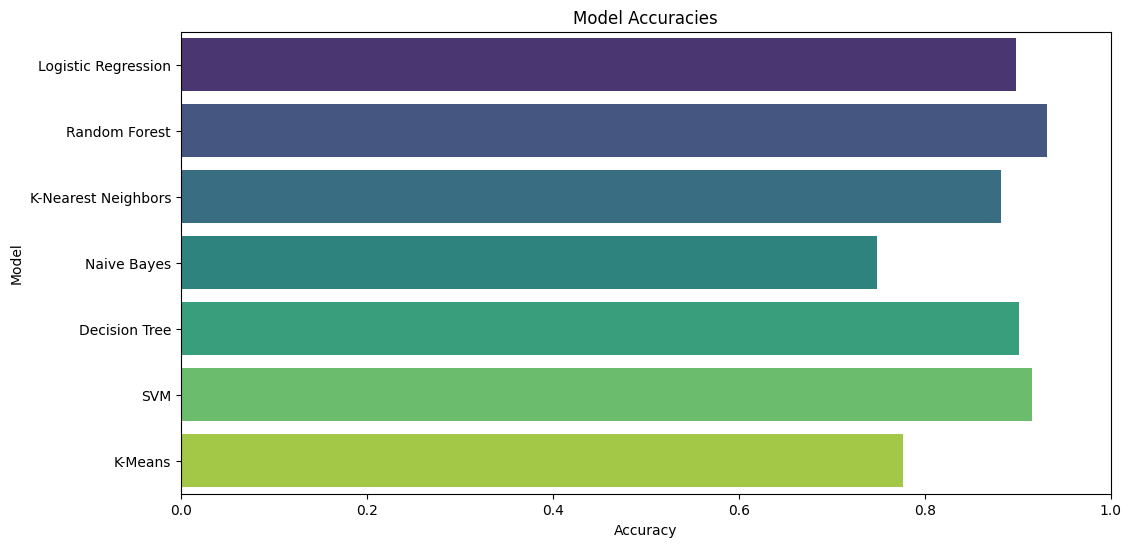

In [ ]:
#can u plot them , u can select the best way to plot them
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the accuracies
plt.figure(figsize=(12, 6))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')
plt.title('Model Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()


Metrics

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate

# Load the dataset
df_model = pd.read_csv('df_model.csv')

# Assuming 'loan_status' is the target variable and the rest are features
X = df_model.drop(columns=['loan_status']).values
y = df_model['loan_status'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'K-Means': KMeans(n_clusters=2, random_state=42)
}

# Train and evaluate classifiers
metrics = []
for name, clf in classifiers.items():
    if name == 'K-Means':
        clf.fit(X_train)
        y_pred = clf.predict(X_test)

        # Map cluster labels to the original labels by finding the majority label per cluster
        labels = np.zeros_like(y_pred)
        for i in range(2):  # Assuming two clusters
            cluster_mask = (clf.labels_ == i)
            if np.any(cluster_mask):
                # Find the most frequent label for this cluster
                unique_labels, counts = np.unique(y_train[cluster_mask], return_counts=True)
                majority_label = unique_labels[np.argmax(counts)]  # Get the most frequent label
                labels[y_pred == i] = majority_label
        y_pred_final = labels
    else:
        clf.fit(X_train, y_train)
        y_pred_final = clf.predict(X_test)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred_final)
    precision = precision_score(y_test, y_pred_final, zero_division=1)
    recall = recall_score(y_test, y_pred_final, zero_division=1)
    f1 = f1_score(y_test, y_pred_final, zero_division=1)
    
    metrics.append((name, acc, precision, recall, f1))

# Create a DataFrame for metrics
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Print metrics using tabulate
print("\nModel Metrics:")
print(tabulate(metrics_df, headers='keys', tablefmt='pretty'))



Model Metrics:
+---+---------------------+--------------------+--------------------+--------------------+--------------------+
|   |        Model        |      Accuracy      |     Precision      |       Recall       |      F1-Score      |
+---+---------------------+--------------------+--------------------+--------------------+--------------------+
| 0 | Logistic Regression | 0.8979659886628877 | 0.7805755395683454 | 0.7557213930348259 | 0.7679474216380182 |
| 1 |    Random Forest    | 0.928865177281316  | 0.8973317865429234 | 0.7696517412935323 | 0.8286020353508302 |
| 2 | K-Nearest Neighbors | 0.881516060909192  | 0.7843373493975904 | 0.6477611940298508 | 0.7095367847411445 |
| 3 |     Naive Bayes     | 0.7489163054351451 | 0.4699927693420101 | 0.9701492537313433 | 0.6332196785192401 |
| 4 |    Decision Tree    | 0.8985217294653773 | 0.7719385225582548 | 0.7746268656716417 | 0.7732803575862925 |
| 5 |         SVM         | 0.9153051017005669 | 0.8474387527839644 | 0.7572139303482587

Visulazation of metrics

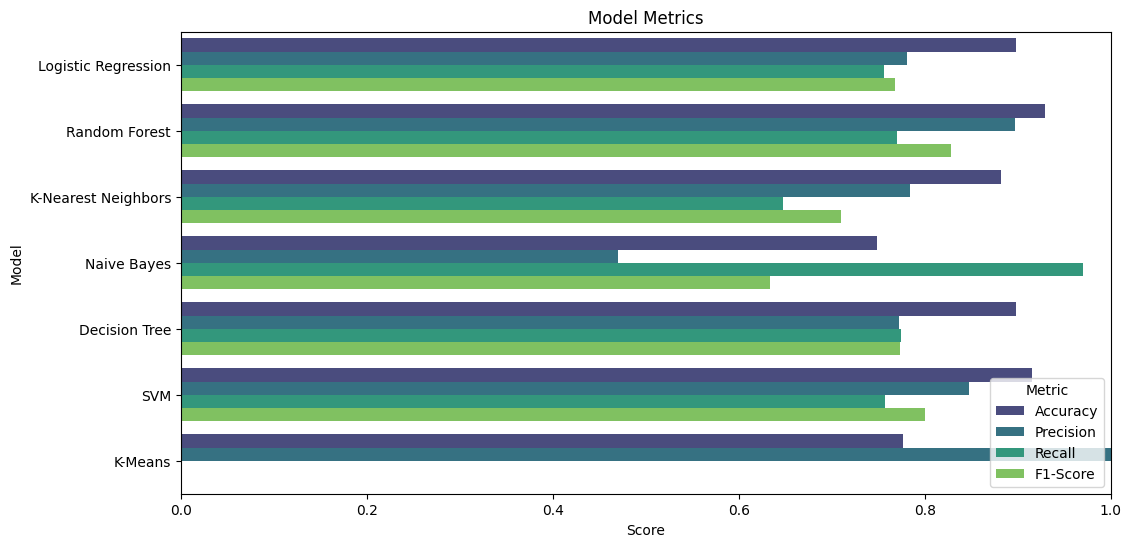

In [ ]:
# Plot the metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the DataFrame to long format
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot the metrics
plt.figure(figsize=(12, 6))
sns.barplot(x='Score', y='Model', hue='Metric', data=metrics_melted, palette='viridis')
plt.title('Model Metrics')
plt.xlabel('Score')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()


Testing

In [ ]:
# Print the column names and their data types
print("Expected input columns and their data types for StandardScaler:")
print(X.dtypes)

In [ ]:
# Print random 5 rows before scaling
random_rows = X.sample(n=5, random_state=42)  # Sample 5 random rows
print("Random 5 rows before applying StandardScaler:")
print(random_rows)

In [ ]:


# Function to test the models with input data
def predict_loan_approval(input_data):
    # Standardize the input data (using the same scaler used for training)
    input_data_scaled = scaler.transform(input_data)
    
    predictions = {}
    
    for name, clf in classifiers.items():
        if name == 'K-Means':
            # Fit KMeans only once on the training data
            clf.fit(X_train)
            
            # Predict the cluster of the input data
            prediction = clf.predict(input_data_scaled)
            
            # Map the cluster to loan approval/rejection
            labels = np.zeros_like(prediction)
            for i in range(2):  # Assuming two clusters
                # Find the most frequent label (loan approval) in the current cluster
                cluster_mask = (clf.labels_ == i)
                if np.any(cluster_mask):
                    unique_labels, counts = np.unique(y_train[cluster_mask], return_counts=True)
                    majority_label = unique_labels[np.argmax(counts)]  # Get the most frequent label
                    labels[prediction == i] = majority_label
            
            predictions[name] = labels[0]  # Predict loan approval/rejection (0/1)
        else:
            clf.fit(X_train, y_train)
            prediction = clf.predict(input_data_scaled)
            predictions[name] = prediction[0]  # Predict loan approval/rejection (0/1)
    
    return predictions

# Example input data: A sample loan applicant (features may vary)
input_data = np.array([[25, 50000, 3, 10000, 10, 0.2, 700, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,0,1,1,1,0,0,0,0,1,1,1,0]])  # Your input data

# Call the function to get predictions
loan_predictions = predict_loan_approval(input_data)

# Print the loan approval prediction for each model
print("\nLoan Approval Predictions for Input Data:")
for model, prediction in loan_predictions.items():
    status = "Approved" if prediction == 1 else "Rejected"
    print(f"{model}: {status}")


Expected input columns and their data types for StandardScaler:
person_age                            float64
person_income                         float64
person_emp_exp                          int64
loan_amnt                             float64
loan_int_rate                         float64
loan_percent_income                   float64
cb_person_cred_hist_length            float64
credit_score                            int64
person_gender_male                      int64
person_education_Bachelor               int64
person_education_Doctorate              int64
person_education_High School            int64
person_education_Master                 int64
person_home_ownership_OTHER             int64
person_home_ownership_OWN               int64
person_home_ownership_RENT              int64
loan_intent_EDUCATION                   int64
loan_intent_HOMEIMPROVEMENT             int64
loan_intent_MEDICAL                     int64
loan_intent_PERSONAL                    int64
loan_intent_VENT